In [29]:
import os
import dotenv
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid = pd.read_csv(r'C:\Users\marale\Desktop\beginner_datasets\owid-covid-data.csv')

covid


iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
387244      ZWE    Africa     Zimbabwe  2024-03-13     266359.0        0.0   
387245      ZWE    Africa     Zimbabwe  2024-03-14     266359.0        0.0   
387246      ZWE    Africa     Zimbabwe  2024-03-15     266359.0        0.0   
387247      ZWE    Africa     Zimbabwe  2024-03-16     266359.0        0.0   
387248      ZWE    Africa     Zimbabwe  2024-03-17     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
387244               0.143        5740.0         0.0                  0.0   
387245               0.143        5740.0         0.0                  0.0   
387246               0.143        5740.0         0.0                  0.0   
387247               0.143        5740.0         0.0                  0.0   
387248               0.000        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
387244  ...          30.7                  36.791                         1.7   
387245  ...          30.7                  36.791                         1.7   
387246  ...          30.7                  36.791                         1.7   
387247  ...          30.7                  36.791                         1.7   
387248  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
387244            61.49                    0.571  16320539.0   
387245            61.49                    0.571  16320539.0   
387246            61.49                    0.571  16320539.0   
387247            61.49                    0.571  16320539.0   
387248            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

In [2]:
# Si richiede di verificare le dimensioni del dataset e le diciture presenti nell'intestazione;

covid.shape

(387249, 67)

In [15]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;
# si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;
cont_case = covid.groupby('continent')['total_cases'].sum().reset_index()
cont_case['tot cases'] = cont_case['total_cases'].apply(lambda x: f"{x:,.0f}")
cont_case= cont_case.drop('total_cases',axis=1)
cont_case

continent        tot cases
0         Africa   12,776,779,335
1           Asia  209,966,253,167
2         Europe  201,388,821,111
3  North America  109,662,596,619
4        Oceania    9,506,027,179
5  South America   63,844,167,999

In [5]:
# si chiede di sviluppare una funzione che prenda in input il dataset e due nomi di continenti, e che ne confronti i seguenti relativi descrittori statistici
# : valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

# creo un df groupby con le stats richieste 
stats_cont = covid.groupby('continent')['total_cases'].agg(['sum','min','max','mean']).reset_index()
# Rinomina le colonne 
stats_cont.columns = ['Continent', 'Total Cases', 'Min Cases', 'Max Cases', 'Mean Cases']

#formatto la colonna 
stats_cont['Total Cases Formatted'] = stats_cont['Total Cases'].apply(lambda x: f"{x:,.0f}")
stats_cont = stats_cont.drop('Total Cases',axis=1)

continente1 = input("Inserisci il nome del primo continente: ")
continente2 = input("Inserisci il nome del secondo continente: ")

# Utilizza l'input dell'utente per filtrare 'stats_df' e trovare le righe corrispondenti
righe_selezionate = stats_cont[(stats_cont['Continent'] == continente1) | (stats_cont['Continent'] == continente2)]

# Stampa le righe filtrate per mostrare le statistiche per i continenti scelti
print(righe_selezionate)


Inserisci il nome del primo continente:  Asia
Inserisci il nome del secondo continente:  Africa


  Continent  Min Cases   Max Cases    Mean Cases Total Cases Formatted
0    Africa        1.0   4072636.0  1.553786e+05        12,776,779,335
1      Asia        1.0  99343195.0  3.183043e+06       209,966,253,167


In [42]:
#Si chiede poi di effettuare lo stesso tipo di analisi – anche in questo caso sviluppando una funzione ad hoc – per il numero di vaccinazioni totali per ogni continente;'total_vaccinations'
stats_vac = covid.groupby('continent')['total_vaccinations'].agg(['sum']).reset_index()
# Rinomina le colonne 
stats_vac.columns = ['Continent', 'Total Vacinations']

#formatto la colonna 
stats_vac['Total Vaccinations Formatted'] = stats_vac['Total Vacinations'].apply(lambda x: f"{x:,.0f}")
stats_vac = stats_vac.drop('Total Vacinations',axis=1)

continente1 = input("Inserisci il nome del primo continente: ")
continente2 = input("Inserisci il nome del secondo continente: ")

# Utilizza l'input dell'utente per filtrare 'stats_df' e trovare le righe corrispondenti
righe_selezionate = stats_vac[(stats_cont['Continent'] == continente1) | (stats_vac['Continent'] == continente2)]

# Stampa le righe filtrate per mostrare le statistiche per i continenti scelti
print(righe_selezionate)


Inserisci il nome del primo continente:  Oceania
Inserisci il nome del secondo continente:  South America


       Continent Total Vaccinations Formatted
4        Oceania               26,056,752,359
5  South America              427,146,297,549


In [ ]:
# Alla fine, basandosi sui calcoli fatti, 
#il committente chiede di stilare un breve (tre o quattro righe) paragrafo testuale riassuntivo sulle statistiche di casi e vaccinazioni, 
# che si concentri solo sulle differenze esistenti tra Europa, Sud, America e Oceania

Analizzando i dati relativi a casi e vaccinazioni di COVID-19, l'Asia emerge con un massimo di casi di circa 99,34 milioni e un totale di vaccinazioni che supera i 4,42 quadrilioni, 
sottolineando una vasta campagna di immunizzazione.
L'Europa, con un picco di circa 38,99 milioni di casi, ha registrato oltre 726 miliardi di vaccinazioni,
riflettendo anch'essa un imponente sforzo di vaccinazione.

Africa mostra un numero massimo di casi di circa 4,07 milioni, con un totale di oltre 12,77 miliardi di casi e circa 50,81 miliardi di vaccinazioni 
somministrate, evidenziando la sfida posta dalla pandemia su vasta scala. In contrasto, 
il Nord America registra un massimo di circa 103,44 milioni di casi, con un'impressionante cifra totale di oltre 109,66 miliardi di casi e circa 574,74 miliardi di vaccinazioni.

L'Oceania ha registrato un massimo di circa 11,81 milioni di casi, con un totale complessivo di casi che ammonta a circa 9,51 miliardi e oltre 26,05 miliardi di vaccinazioni effettuate. 
In contrasto marcato, il Sud America ha visto un picco di casi di circa 37,52 milioni, accumulando un totale di quasi 63,84 miliardi di casi, con un notevole sforzo 
vaccinale evidenziato da circa 427,15 miliardi di vaccinazioni. 


In [2]:
covid.head(5)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [31]:
#NUOVA TRACCIA ESAME

# Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.
# Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
# Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

cov_ita = covid.loc[(covid['location'] == 'Italy') & (covid['date'].str.startswith('2022'))]
cov_ita['date'] = pd.to_datetime(cov_ita['date'])
cov_ita = cov_ita.sort_values(by='date')
cov_ita

C:\Users\marale\AppData\Local\Temp\ipykernel_23888\623718183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_ita['date'] = pd.to_datetime(cov_ita['date'])


iso_code continent location       date  total_cases  new_cases  \
166369      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
166370      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
166371      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
166372      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
166373      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
166729      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
166730      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
166731      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
166732      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
166733      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
166369           36797.000      136530.0         0.0              140.857   
166370           92086.286      137513.0       983.0              140.429   
166371           92086.286      137513.0         0.0              140.429   
166372           92086.286      137513.0         0.0              140.429   
166373           92086.286      137513.0         0.0              140.429   
...                    ...           ...         ...                  ...   
166729           18918.143      184168.0         0.0              114.000   
166730           18918.143      184168.0         0.0              114.000   
166731           18918.143      184168.0         0.0              114.000   
166732           18918.143      184168.0         0.0              114.000   
166733           18918.143      184168.0         0.0              114.000   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
166369  ...          27.8                     NaN                        3.18   
166370  ...          27.8                     NaN                        3.18   
166371  ...          27.8                     NaN                        3.18   
166372  ...          27.8                     NaN                        3.18   
166373  ...          27.8                     NaN                        3.18   
...     ...           ...                     ...                         ...   
166729  ...          27.8                     NaN                        3.18   
166730  ...          27.8                     NaN                        3.18   
166731  ...          27.8                     NaN                        3.18   
166732  ...          27.8                     NaN                        3.18   
166733  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
166369            83.51                    0.892  59037472.0   
166370            83.51                    0.892  59037472.0   
166371            83.51                    0.892  59037472.0   
166372            83.51                    0.892  59037472.0   
166373            83.51                    0.892  59037472.0   
...                 ...                      ...         ...   
166729            83.51                    0.892  59037472.0   
166730            83.51                    0.892  59037472.0   
166731            83.51                    0.892  59037472.0   
166732            83.51                    0.892  59037472.0   
166733            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
166369                                   NaN                          NaN   
166370                              168226.3                        12.99   
166371                                   NaN                          NaN   
166372                                   NaN                          NaN   
166373                                   NaN                          NaN   
.

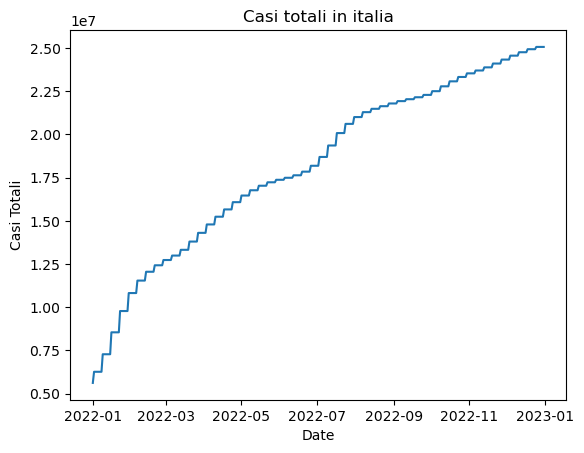

In [32]:
plt.plot(cov_ita['date'], cov_ita['total_cases'])
plt.xlabel('Date')
plt.ylabel('Casi Totali')
plt.title('Casi totali in italia')
plt.show()

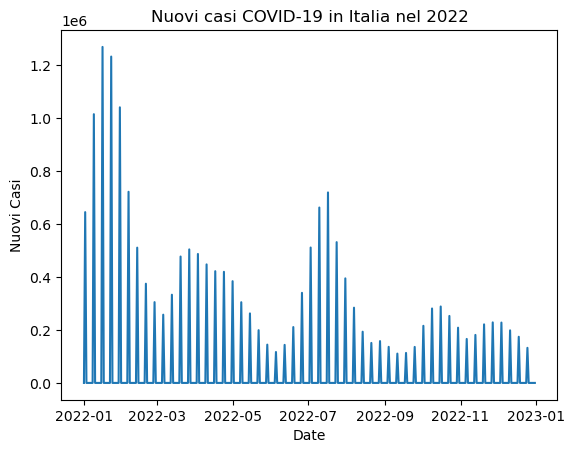

In [33]:
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).

plt.plot(cov_ita['date'], cov_ita['new_cases'])
plt.xlabel('Date')
plt.ylabel('Nuovi Casi')
plt.title('Nuovi casi COVID-19 in Italia nel 2022')
plt.show()

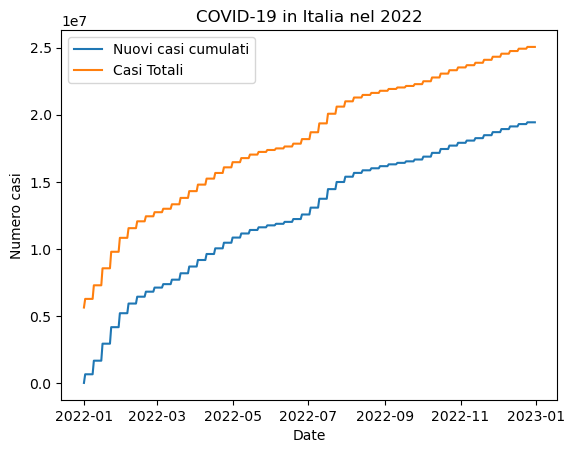

In [34]:
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

cov_ita['cumu_new_cases'] = cov_ita['new_cases'].cumsum()

# Plot the cumulative sum of new cases and total cases over time
fig, ax = plt.subplots()
ax.plot(cov_ita['date'], cov_ita['cumu_new_cases'], label='Nuovi casi cumulati')
ax.plot(cov_ita['date'], cov_ita['total_cases'], label='Casi Totali')
ax.set_xlabel('Date')
ax.set_ylabel('Numero casi')
ax.set_title('COVID-19 in Italia nel 2022')
ax.legend()
plt.show()

# commento: Andamento dei due asset correlato e speculare .

In [45]:
#Riguardo le nazioni di Italia, Germania e Francia,mostrare in un boxplot la differenza tra queste nazioni riguardo 
#il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso),e scrivere un breve commento a riguardo;
cov_euro = covid.loc[(covid['location'].isin(['Italy', 'Germany', 'France','Spain'])) & (covid['date'] >= '2022-05-01')]
cov_euro['date'] = pd.to_datetime(cov_ita['date'])
cov_euro = cov_euro.sort_values(by='date')
cov_euro

C:\Users\marale\AppData\Local\Temp\ipykernel_23888\2405550839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_euro['date'] = pd.to_datetime(cov_ita['date'])


iso_code continent location       date  total_cases  new_cases  \
166489      ITA    Europe    Italy 2022-05-01   16463200.0   383991.0   
166490      ITA    Europe    Italy 2022-05-02   16463200.0        0.0   
166491      ITA    Europe    Italy 2022-05-03   16463200.0        0.0   
166492      ITA    Europe    Italy 2022-05-04   16463200.0        0.0   
166493      ITA    Europe    Italy 2022-05-05   16463200.0        0.0   
...         ...       ...      ...        ...          ...        ...   
327893      ESP    Europe    Spain        NaT   13980340.0        NaN   
327894      ESP    Europe    Spain        NaT   13980340.0        NaN   
327895      ESP    Europe    Spain        NaT   13980340.0        NaN   
327896      ESP    Europe    Spain        NaT   13980340.0        NaN   
327897      ESP    Europe    Spain        NaT   13980340.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
166489           54855.857      163507.0       898.0              128.286   
166490           54855.857      163507.0         0.0              128.286   
166491           54855.857      163507.0         0.0              128.286   
166492           54855.857      163507.0         0.0              128.286   
166493           54855.857      163507.0         0.0              128.286   
...                    ...           ...         ...                  ...   
327893                 NaN      121852.0         NaN                  NaN   
327894                 NaN      121852.0         NaN                  NaN   
327895                 NaN      121852.0         NaN                  NaN   
327896                 NaN      121852.0         NaN                  NaN   
327897                 NaN      121852.0         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
166489  ...          27.8                     NaN                        3.18   
166490  ...          27.8                     NaN                        3.18   
166491  ...          27.8                     NaN                        3.18   
166492  ...          27.8                     NaN                        3.18   
166493  ...          27.8                     NaN                        3.18   
...     ...           ...                     ...                         ...   
327893  ...          31.4                     NaN                        2.97   
327894  ...          31.4                     NaN                        2.97   
327895  ...          31.4                     NaN                        2.97   
327896  ...          31.4                     NaN                        2.97   
327897  ...          31.4                     NaN                        2.97   

        life_expectancy  human_development_index  population  \
166489            83.51                    0.892  59037472.0   
166490            83.51                    0.892  59037472.0   
166491            83.51                    0.892  59037472.0   
166492            83.51                    0.892  59037472.0   
166493            83.51                    0.892  59037472.0   
...                 ...                      ...         ...   
327893            83.56                    0.904  47558632.0   
327894            83.56                    0.904  47558632.0   
327895            83.56                    0.904  47558632.0   
327896            83.56                    0.904  47558632.0   
327897            83.56                    0.904  47558632.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
166489                             186897.39                        12.24   
166490                                   NaN                          NaN   
166491                                   NaN                          NaN   
166492                                   NaN                          NaN   
166493                                   NaN                          NaN   
.

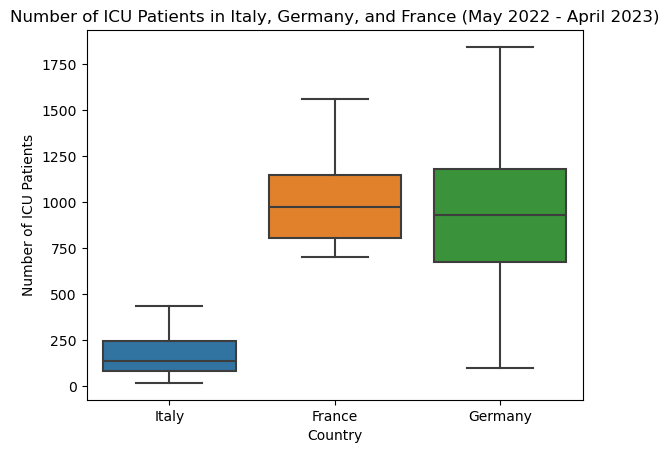

In [39]:
sns.boxplot(x='location', y='icu_patients', data=cov_euro)

# Set plot title and labels
plt.title('Number of ICU Patients in Italy, Germany, and France (May 2022 - April 2023)')
plt.xlabel('Country')
plt.ylabel('Number of ICU Patients')

# Show the plot
plt.show()

In [40]:
cov_euro.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


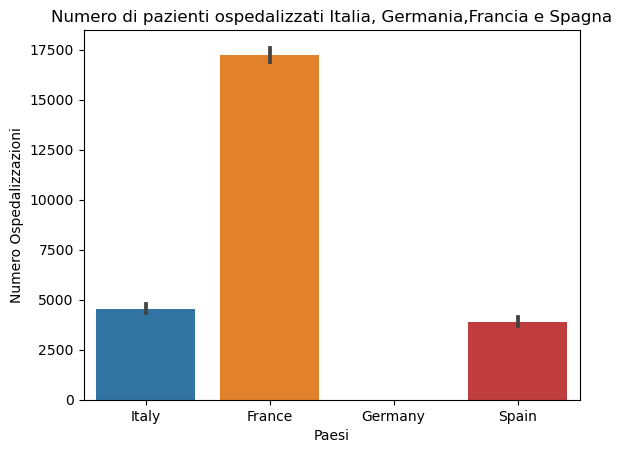

In [49]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati
#per ognuna ,se ci sono dati nulli suggerire se può essere popssibile gestirli tramite sotiruzione o meno 


sns.barplot(x='location', y='hosp_patients', data= cov_euro)

plt.title('Numero di pazienti ospedalizzati Italia, Germania,Francia e Spagna')
plt.xlabel('Paesi')
plt.ylabel('Numero Ospedalizzazioni')

# Show the plot
plt.show()
